In [2]:
import pandas as pd
import re

Import the data as a pandas dataframe from a csv file.

In [3]:
# import the data
df = pd.read_csv('labeled_data_new.csv')


In [ ]:
Import Statements:
import pandas as pd: Imports the pandas library, commonly used for data manipulation and analysis. It's not used in the provided functions.
import re: Imports Python's regular expression library, which is used for string searching and manipulation.
Function clean_tweet_v3:
Purpose: Cleans a given tweet string.
Process:
Remove URLs: Uses a regular expression to remove any strings that start with 'http', 'www', or 'https'. The flags=re.MULTILINE ensures that the pattern is applied to each line of the string.
Remove Special Characters, Numbers, and "RT": Removes exclamation marks, at symbols, hashtags, periods, digits, and the string "RT" (commonly used for retweets on Twitter).
Return Cleaned Tweet: Returns the cleaned tweet string with leading and trailing white spaces removed.


In [4]:
import pandas as pd
import re

# Function to clean the tweet
def clean_tweet_v3(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove specified special characters, numbers, and "RT"
    tweet = re.sub(r'[!@#.\d]|RT', '', tweet)
    return tweet.strip()
def clean_tweet_v3(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove specified special characters, numbers, and "RT"
    tweet = re.sub(r'[!@#.\d]|RT', '', tweet)
    # Remove numbers 0 to 9
    tweet = re.sub(r'\d', '', tweet)
    return tweet.strip()

def clean_tweet_v3(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+|www\S+|https\S+', '', tweet, flags=re.MULTILINE)
    # Remove specified special characters, numbers, and "RT"
    tweet = re.sub(r'[!@#.\d]|RT', '', tweet)
    # Remove numbers 0 to 9
    tweet = re.sub(r'[0-9]', '', tweet)
    return tweet.strip()




In [5]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


Making subsets of the data

In [7]:
# subset the data to only include the tweets and the label
df_sub = df[['tweet', 'offensive_language']]

Building dichotomous labels


In [8]:
# recode if 0 then 0 else 1
df_sub['offensive_language'] = df_sub['offensive_language'].apply(lambda x: 0 if x == 0 else 1)


/var/folders/wd/fzj4fynx73l9ts0177tlxx2h0000gn/T/ipykernel_41784/1333284418.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['offensive_language'] = df_sub['offensive_language'].apply(lambda x: 0 if x == 0 else 1)


In [9]:
df_sub.head(10000)

,tweet,offensive_language
0,!!! RT @mayasolovely: As a woman you shouldn't...,0
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1
3,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,1
4,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,1
...,...,...
9995,"I ain't trying to fuck, bitch. I just want wings.",1
9996,I aint mad at you bitches thats what hoes do,1
9997,"I aint mad at you, thats what hoes do",1
9998,I aint never had a prob with no other bitch ov...,1


Plotting the distribution of the labels as a bar chart.

<Axes: xlabel='offensive_language'>

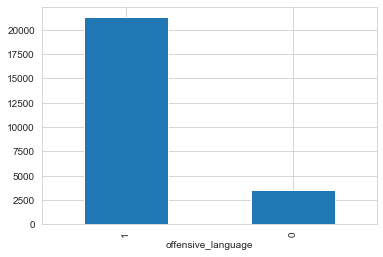

In [10]:
# plot the distribution of the hate speech label
df_sub['offensive_language'].value_counts().plot(kind='bar')


Exporting the subsetted data as a csv file.

In [11]:
# save a csv file of the subsetted data
df_sub.to_csv('labeled_data_subset.csv', index=True)